In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats



# Сравнение нескольких выборок: ANOVA, KRUSKEL-WALLIS

In [2]:
data = pd.read_csv("winemag-data-130k-v2.csv")
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
df = data[[ 'country', 'description', 'designation', 'points', 'price', 'province', 'title', 'variety', 'winery']]
df.to_csv('wine.csv',index=False)

In [4]:
dataNew = pd.read_csv("wine.csv")
dataNew.head()

,country,description,designation,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
len(dataNew['country'])

129971

In [6]:
print(np.max(dataNew['price']))
print(np.min(dataNew['price']))
print(np.argmax(dataNew['price']))
print(np.argmin(dataNew['price']))

3300.0
4.0
80290
1987


Анализируем вино Late Harvest - это сладкое белое вино позднего урожая, когда виноград собирается уже немного подмерзший и очень сладкий, поскольку сахар накапливается со временем. Вино это производится в разных странах, попробуем понять, в какой стране оно лучше всего

Осваиваем пакет pandas


Сначала посмотрим, сколько их вообще

In [7]:
def isLateHarvest(x):
    if type(x)==str:
        return  ('Late Harvest' in x)             
    return False

LH = dataNew.groupby(dataNew.apply(lambda x: isLateHarvest(x['title']) or isLateHarvest(x['designation']) ,axis=1))
LH.groups



{False: [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...], True: [3, 1097, 1245, 1752, 2370, 3762, 4046, 4468, 4734, 5547, 5580, 6267, 7360, 7379, 7789, 8100, 8264, 8321, 8328, 8346, 9592, 9645, 10277, 11216, 12572, 12879, 13443, 13804, 14239, 14626, 14993, 16241, 16494, 16664, 16969, 17347, 17361, 17437, 17843, 18113, 18448, 18671, 19257, 19808, 19881, 20105, 20311, 20848, 20980, 21135, 21971, 22464, 23723, 23754, 23775, 23858, 24058, 24405, 25530, 25773, 26478, 27624, 28011, 28625, 29412, 31035, 31873, 31912, 33067, 33308, 33450, 33587, 33654, 34384, 34505, 34671, 35068, 35697, 36082, 38432, 39445, 39497, 39506, 39561, 40176, 40474, 41164, 41

In [8]:
B = dataNew.groupby(['province'] ,axis=0)
B.groups

{'Achaia': [52269, 72355, 101471, 107621, 112614], 'Aconcagua Costa': [2205, 4196, 13764, 14436, 21500, 21647, 22553, 22664, 23119, 27834, 31554, 36442, 37539, 41802, 60084, 60635, 67145, 73468, 88471, 89495, 96968, 101842, 103213, 103975, 106915, 115378, 128748], 'Aconcagua Valley': [164, 298, 1917, 2418, 2707, 4311, 5768, 6244, 7262, 8076, 8186, 8187, 8394, 8759, 10824, 11097, 11985, 13253, 14224, 15721, 16148, 17310, 18760, 19191, 20501, 20790, 21962, 23520, 24592, 24639, 24707, 25015, 26412, 29195, 29472, 30619, 31299, 36013, 36014, 40837, 43255, 43413, 45648, 46401, 46793, 49026, 49973, 50909, 51789, 52807, 53065, 53066, 55217, 56768, 58560, 60451, 61699, 62072, 63094, 63102, 63166, 66012, 66841, 67586, 68414, 69974, 70120, 70537, 70648, 71486, 71681, 74594, 74969, 79101, 79458, 79530, 79881, 81332, 82248, 82647, 83443, 85378, 86905, 89647, 92445, 96234, 96748, 98487, 99527, 100031, 100232, 101117, 101896, 103394, 106238, 108334, 110096, 110207, 113272, 113600, ...], 'Aegean': [87

Отберем только те, которые нужны - у которых "True" и выбросим NaN

In [9]:
Late = LH.get_group(True)
Late=Late.dropna(axis=0)
Late

,country,description,designation,points,price,province,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
1097,US,This super-smooth late harvest effort is perfe...,StevensSweets Late Harvest,90,15.0,Washington,Stevens 2012 StevensSweets Late Harvest Viogni...,Viognier,Stevens
1245,South Africa,"This delicate, elegant NLH wine starts with al...",Noble Late Harvest,88,35.0,Stellenbosch,Mulderbosch 2006 Noble Late Harvest Sauvignon ...,Sauvignon Blanc,Mulderbosch
1752,US,This is a straightforward quaffer. Aromas of h...,Late Harvest,84,10.0,Washington,Washington Hills 2014 Late Harvest Riesling (W...,Riesling,Washington Hills
2370,US,Don't let the label mislead you; this is not a...,Late Harvest,88,11.0,Washington,Hogue 2012 Late Harvest Riesling (Columbia Val...,Riesling,Hogue
...,...,...,...,...,...,...,...,...,...
126764,US,"At 160g/L residual sugar, this late-harvest wi...",Ethos Reserve Late Harvest,91,40.0,Washington,Chateau Ste. Michelle 2013 Ethos Reserve Late ...,Riesling,Chateau Ste. Michelle
127093,US,It's hard to choose a favorite amidst Wiemer's...,Josef Vineyard Late Harvest Estate Bottled and...,92,45.0,New York,Hermann J. Wiemer 2012 Josef Vineyard Late Har...,Riesling,Hermann J. Wiemer
127267,US,"This is a complex and lively dessert wine, wit...",Fiorellino Murmur Vineyard Late Harvest,92,40.0,California,Mattina Fiore 2013 Fiorellino Murmur Vineyard ...,Viognier,Mattina Fiore
127586,US,A brilliant dessert wine. It costs a lot of mo...,Gold Select Late Harvest Blanc,94,65.0,California,Martin Estate 2007 Gold Select Late Harvest Bl...,Semillon-Sauvignon Blanc,Martin Estate


Теперь посмотрим как все это распределено по странам

In [10]:
Late.groupby('country').groups


{'Argentina': [25530, 78972], 'Austria': [33654], 'Canada': [5580, 17843, 20311, 27624, 35068, 99472, 111005, 120153], 'Chile': [4046, 8328, 14239, 19257, 21135, 26478, 46742, 46970, 50744, 61423, 61818, 61897, 62641, 66563, 94252, 95413, 115257, 118316, 122640, 122900, 125318], 'France': [8264], 'Germany': [9592, 23723, 68053, 76702, 119116], 'Hungary': [38432, 40176, 46692, 61633, 80857, 88949, 102709, 116828], 'Israel': [33587, 46298, 108530, 110137, 117525], 'New Zealand': [8100, 44408, 45756, 80885, 100025], 'Portugal': [17347, 36082, 43483, 44297, 55388, 61425, 62420, 72791, 99350, 107976], 'Romania': [39497, 39506], 'South Africa': [1245, 7379, 12879, 23858, 41682, 57639, 71811, 72600, 74134], 'Spain': [61798, 76848], 'US': [3, 1097, 1752, 2370, 3762, 4468, 4734, 5547, 6267, 7360, 7789, 8321, 8346, 9645, 10277, 11216, 12572, 13443, 13804, 14626, 14993, 16241, 16494, 16664, 16969, 17361, 17437, 18113, 18448, 18671, 19808, 19881, 20848, 20980, 21971, 22464, 23754, 23775, 24058, 24

Тут нужно подумать... некоторых слишком много, некоторых слишком мало а рекомендация была о примерно одинаковых объемах групп

Даже на этой выборке из 271 можно задать разные вопросы

- Сравнить места, где производится много такого вина - между собой

Калифорния, остальные US, Чили+Аргентина

- Сравнить страны, где производится мало такого вина - между собой

Германия, Венгрия, Израиль, Испания, Южная Африка

- Все 9 сравнить невзирая на разные объемы

Сравнить по континентам

- Европа, Америка, остальной Новый Свет

Но мы сделаем еще немного по-другому: Калифорния, Остальные США, Европа, Новый мир

In [12]:
def Continent(x, y):
    if (y=='California'):
        return 'California'
    elif (x == 'US'):
        return 'US'
    elif (x == 'Austria' or x=='France' or x=='Germany' or x=='Hungary' or x=='Italy' or x=='Portugal' or x=='Romania' or x=='Slovenia' or x=='Spain'):
        return 'Europe'
    return 'New World'

In [13]:
Late['continent'] = Late.apply(lambda x: Continent(x['country'], x['province']), axis=1)

Для применения методов ANOVA и Краскела-Уоллиса нужна непрерывная случайная величина. На основе выставленных оценок и цены построим величину, и непрерывную, и характеризующую качество.

In [14]:
Late['pointsbyprice']= Late.apply(lambda x: x['points']/(10+np.log( x['price'])), axis=1)

In [15]:
Late

,country,description,designation,points,price,province,title,variety,winery,continent,pointsbyprice
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,US,6.924023
1097,US,This super-smooth late harvest effort is perfe...,StevensSweets Late Harvest,90,15.0,Washington,Stevens 2012 StevensSweets Late Harvest Viogni...,Viognier,Stevens,US,7.082125
1245,South Africa,"This delicate, elegant NLH wine starts with al...",Noble Late Harvest,88,35.0,Stellenbosch,Mulderbosch 2006 Noble Late Harvest Sauvignon ...,Sauvignon Blanc,Mulderbosch,New World,6.491903
1752,US,This is a straightforward quaffer. Aromas of h...,Late Harvest,84,10.0,Washington,Washington Hills 2014 Late Harvest Riesling (W...,Riesling,Washington Hills,US,6.827833
2370,US,Don't let the label mislead you; this is not a...,Late Harvest,88,11.0,Washington,Hogue 2012 Late Harvest Riesling (Columbia Val...,Riesling,Hogue,US,7.097979
...,...,...,...,...,...,...,...,...,...,...,...
126764,US,"At 160g/L residual sugar, this late-harvest wi...",Ethos Reserve Late Harvest,91,40.0,Washington,Chateau Ste. Michelle 2013 Ethos Reserve Late ...,Riesling,Chateau Ste. Michelle,US,6.647732
127093,US,It's hard to choose a favorite amidst Wiemer's...,Josef Vineyard Late Harvest Estate Bottled and...,92,45.0,New York,Hermann J. Wiemer 2012 Josef Vineyard Late Har...,Riesling,Hermann J. Wiemer,US,6.663450
127267,US,"This is a complex and lively dessert wine, wit...",Fiorellino Murmur Vineyard Late Harvest,92,40.0,California,Mattina Fiore 2013 Fiorellino Murmur Vineyard ...,Viognier,Mattina Fiore,California,6.720784
127586,US,A brilliant dessert wine. It costs a lot of mo...,Gold Select Late Harvest Blanc,94,65.0,California,Martin Estate 2007 Gold Select Late Harvest Bl...,Semillon-Sauvignon Blanc,Martin Estate,California,6.631680


In [16]:
Late.groupby('continent').groups

{'California': [5547, 8346, 13443, 14626, 14993, 16494, 16664, 17437, 18113, 18448, 19808, 21971, 23775, 24058, 25773, 28011, 28625, 31873, 31912, 33308, 34505, 34671, 35697, 39561, 40474, 41164, 41841, 44417, 46437, 47435, 47543, 48048, 48498, 49148, 50258, 50485, 52232, 52629, 52962, 53286, 53529, 60218, 61587, 64795, 66255, 66402, 67364, 68193, 69093, 69204, 71296, 71770, 73874, 73888, 74226, 74813, 79082, 80625, 81694, 83458, 83698, 85423, 89823, 94714, 96370, 97185, 97757, 97765, 98357, 98655, 99140, 100151, 102161, 102856, 103830, 104907, 105877, 105880, 109416, 109808, 112201, 114747, 116043, 116793, 120221, 121506, 124240, 125783, 127267, 127586, 129145], 'Europe': [8264, 9592, 17347, 23723, 33654, 36082, 38432, 39497, 39506, 40176, 43483, 44297, 46692, 55388, 61425, 61633, 61798, 62420, 68053, 72791, 76702, 76848, 80857, 88949, 99350, 102709, 107976, 116828, 119116], 'New World': [1245, 4046, 5580, 7379, 8100, 8328, 12879, 14239, 17843, 19257, 20311, 21135, 23858, 25530, 26478

Чтобы прикинуть, какой разброс и можно ли надеяться на равенство дисперсий, построим "ящики с усами" 

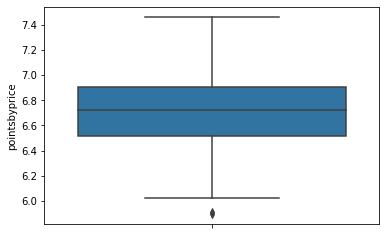

In [17]:
sns.boxplot( y=Late['pointsbyprice'] );
plt.show()

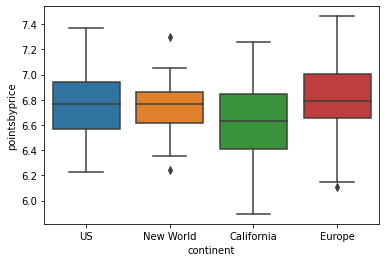

In [18]:
sns.boxplot( y=Late['pointsbyprice'], x=Late['continent'] );
plt.show()

Теперь проверим равенство дисперсий статистическими методами

In [19]:
stats.levene(Late['pointsbyprice'][Late['continent'] == 'California'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'],
             Late['pointsbyprice'][Late['continent'] == 'New World'])


LeveneResult(statistic=2.558277410537948, pvalue=0.05552052525798205)

Проверяем выборки на нормальность

In [20]:
stats.shapiro(Late['pointsbyprice'][Late['continent'] == 'California'])

ShapiroResult(statistic=0.9878925681114197, pvalue=0.56903076171875)

In [21]:
len(Late['pointsbyprice'][Late['continent'] == 'California'])

91

In [22]:
stats.shapiro(Late['pointsbyprice'][Late['continent'] == 'Europe'])

ShapiroResult(statistic=0.9707318544387817, pvalue=0.5797094702720642)

In [23]:
len(Late['pointsbyprice'][Late['continent'] == 'Europe'])

29

In [24]:
stats.shapiro(Late['pointsbyprice'][Late['continent'] == 'US'])

ShapiroResult(statistic=0.9774810671806335, pvalue=0.08151241391897202)

In [25]:
len(Late['pointsbyprice'][Late['continent'] == 'US'])

101

In [26]:
stats.shapiro( Late['pointsbyprice'][Late['continent'] == 'New World'])

ShapiroResult(statistic=0.9860780239105225, pvalue=0.8167901039123535)

In [27]:
len(Late['pointsbyprice'][Late['continent'] == 'New World'])

50

Ура!! можно применять ANOVA

In [28]:
stats.f_oneway(Late['pointsbyprice'][Late['continent'] == 'California'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'],
             Late['pointsbyprice'][Late['continent'] == 'New World'])

F_onewayResult(statistic=6.278263202035402, pvalue=0.00039358025107047017)

Непараметрические методы тоже никто не запрещал применить

In [29]:
stats.kruskal(Late['pointsbyprice'][Late['continent'] == 'California'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'],
             Late['pointsbyprice'][Late['continent'] == 'New World'])

KruskalResult(statistic=15.983461907934611, pvalue=0.0011428718801900757)

# Теперь post-hoc тесты

Первый - Тьюки, Второй Данна 

При каждой проверке равенства по 2 пусть уровень значимости 0,05
Тогда


H012: 'California' = 'Europe' \alpha = 0,05

H013: 'California' = 'US'    \alpha = 0,05

H014: 'California' = 'New World'   \alpha = 0,05

H023........
 
Вероятность того, что хотя бы для одной пары мы совершим ошибку 1 рода
1-(1-0,05)^(6)

In [30]:
FWER = 1-(1-0.05)**(6)
FWER

0.2649081093750002

#### Растет ошибка первого рода!!! :((

FWER - вероятность отвергнуть хотя бы одну H0ij, когда все средние равны 

FWER нужно фиксировать при пост-хок тестах!!

### Tukey тест

Определение: Пусть $\xi_1,\dots \xi_k \sim N(0,1)$, $\eta\sim\chi^2_m$ и все эти случайные величины независимы. Распределение стьюдентовского размаха с $(k,m)$ степенями свободы - это распределение случайной величины 
$$
S_{k,m}\sim \frac{\xi_{(k)} - \xi_{(1)}}{\sqrt{\frac{1}{m}\eta}}.
$$


$H_{0ij}$ отвергается, на уровне значимости $\alpha$, если 
$$
Y = \frac{|\overline{X_{i\cdot}} - \overline{X_{j\cdot}} |}{\sqrt{\frac{1}{n_1+\dots+n_k-k}\sum\limits_{i,j}(X_{ij} - \overline{X_{i\cdot}})}}>q_{1-\alpha,k,n_1+\dots+n_k-k}
$$
где $q_{1-\alpha,k,n_1+\dots+n_k-k}$ - квантиль уровня $1-\alpha$ стьюдентовского размаха.

Значение p_value вычисляется так

$$p_{value} = \mathsf{P}(S_{k, n_1+\dots+n_k-k}>Y)$$

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=Late['pointsbyprice'], groups=Late['continent'], alpha=0.05)
print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj   lower  upper  reject
----------------------------------------------------------
California    Europe    0.179 0.0111  0.0302 0.3278   True
California New World   0.1247 0.0451  0.0019 0.2476   True
California        US   0.1499  0.001  0.0491 0.2508   True
    Europe New World  -0.0543 0.8018 -0.2172 0.1086  False
    Europe        US  -0.0291    0.9 -0.1761 0.1179  False
 New World        US   0.0252    0.9 -0.0955 0.1459  False
----------------------------------------------------------


In [32]:
pip install scikit_posthocs

     |████████████████████████████████| 43 kB 297 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=64162fd93acc6face6baf7a9b81c90b0513068cdd36df355640514bd1ee658cd
  Stored in directory: /Users/elenabastova/Library/Caches/pip/wheels/59/a1/76/8954a8efb2e143534be5943de94a245c673b25b9ce71c3aab3
Successfully built scikit-posthocs
Note: you may need to restart the kernel to use updated packages.


In [33]:
import scikit_posthocs as spp

## Тест Данна

$H_{0ij}$ отвергается, на уровне значимости $\alpha$, если 
$$|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |>z_{\alpha/k(k-1)}\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}$$
 Значение p_value вычисляется так
 $$
 p_{value} = k(k-1)\cdot\mathsf{P}\left(N(0,1)> \frac{|\overline{R_{i\cdot}} - \overline{R_{j\cdot}} |}{\sqrt{\frac{N(N+1)}{12}\Bigl(\frac{1}{n_i}+\frac{1}{n_j}\Bigr)}}\right)
 $$

In [34]:
spp.posthoc_dunn([Late['pointsbyprice'][Late['continent'] == 'US'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
            Late['pointsbyprice'][Late['continent'] == 'New World'] ,
            Late['pointsbyprice'][Late['continent'] == 'California']], p_adjust='fdr_bh')

,1,2,3,4
1,1.000000,0.467753,0.857421,0.005573
2,0.467753,1.000000,0.467753,0.005924
3,0.857421,0.467753,1.000000,0.022031
4,0.005573,0.005924,0.022031,1.000000


Вывод - Калифорния - ВЫДЕЛЯЕТСЯ

Взглянув еще раз на ящик с усами, можно уточнить вывод - соотношение цена-качество у Калифорнийского вина самое плохое) и существенно хуже, чем в остальных местах.

Следующие несколько клеток - вариации на ту же тему

In [35]:
stats.levene(Late['pointsbyprice'][Late['continent'] == 'New World'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'])


LeveneResult(statistic=2.8574311301744144, pvalue=0.060068411623405836)

In [36]:
stats.f_oneway(Late['pointsbyprice'][Late['continent'] == 'New World'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'])

F_onewayResult(statistic=0.4106676292955641, pvalue=0.6638375894420233)

In [61]:
stats.kruskal(Late['pointsbyprice'][Late['continent'] == 'California'],
             Late['pointsbyprice'][Late['continent'] == 'Europe'],
             Late['pointsbyprice'][Late['continent'] == 'US'])

KruskalResult(statistic=14.584970921938282, pvalue=0.00068063425881442)

А если оценивать чисто по пунктам, то нужно использовать критерий Хи-квадрат, потому что распределение - дискретное

Создадим таблицу сопряженности - Панда - великое животное - это можно сделать одной строчкой!!

In [39]:
Late_crosstab = pd.crosstab(Late['points'], 
                            Late['continent'],  
                               margins = False) 
print(Late_crosstab) 

continent  California  Europe  New World  US
points                                      
80                  1       0          0   0
82                  3       3          1   2
83                  2       1          2   0
84                  5       0          2   5
85                  6       2          4  10
86                  3       0          3  14
87                  9       1          7  13
88                  8       8          8  20
89                  9       4          6   4
90                 13       4         11  14
91                  7       1          2   5
92                 11       1          3   9
93                  5       3          1   2
94                  3       1          0   2
95                  3       0          0   0
96                  3       0          0   1


Теперь применяем Хи-квадрат тест

In [40]:
sp.stats.chi2_contingency(Late_crosstab)

(57.36749732128556,
 0.10218465173939037,
 45,
 array([[ 0.33579336,  0.10701107,  0.18450185,  0.37269373],
        [ 3.02214022,  0.96309963,  1.66051661,  3.35424354],
        [ 1.67896679,  0.53505535,  0.92250923,  1.86346863],
        [ 4.0295203 ,  1.28413284,  2.21402214,  4.47232472],
        [ 7.38745387,  2.35424354,  4.05904059,  8.19926199],
        [ 6.71586716,  2.1402214 ,  3.6900369 ,  7.45387454],
        [10.07380074,  3.2103321 ,  5.53505535, 11.18081181],
        [14.77490775,  4.70848708,  8.11808118, 16.39852399],
        [ 7.72324723,  2.46125461,  4.24354244,  8.57195572],
        [14.10332103,  4.49446494,  7.74907749, 15.65313653],
        [ 5.03690037,  1.60516605,  2.76752768,  5.5904059 ],
        [ 8.05904059,  2.56826568,  4.42804428,  8.94464945],
        [ 3.69372694,  1.17712177,  2.0295203 ,  4.099631  ],
        [ 2.01476015,  0.64206642,  1.10701107,  2.23616236],
        [ 1.00738007,  0.32103321,  0.55350554,  1.11808118],
        [ 1.34317343,  

Получается, что чисто по оценкам различия нет)